In [1]:
import pipit as pp
import pandas as pd
import pipit.plotting.core as vis
from pipit.partitions import Event, Partition, get_partition_graph

### Load Dataset

In [2]:
#Path to OTF2 traces
dirname = "../../pipit/tests/data/game-of-life-otf2"

# Use pipit's ``from_otf2`` API to read in the OTF2 traces.
# The result is stored into pipit's Trace data structure.
trace = pp.Trace.from_otf2(dirname)

# Printout the DataFrame component of the Trace.
display (trace.events.columns)
display (trace.events[trace.events['Process'] == 0].head(40))
display (trace.events.loc[17]['Attributes'])

Index(['Timestamp (ns)', 'Event Type', 'Name', 'Thread', 'Process',
       'Attributes'],
      dtype='object')

,Timestamp (ns),Event Type,Name,Thread,Process,Attributes
2,1.539486e+05,Instant,ProgramBegin,0,0,"{'attributes': {'Attribute 2': 1463386}, 'prog..."
3,1.764308e+05,Enter,"int main(int, char**)",0,0,{'region': 'Region 3'}
5,1.022166e+06,Enter,"void read_input_file(int**, const string&)",0,0,{'region': 'Region 5'}
13,8.269680e+08,Leave,"void read_input_file(int**, const string&)",0,0,None
15,8.270060e+08,Enter,MPI_Init,0,0,{'region': 'Region 151'}
23,1.478312e+09,Leave,MPI_Init,0,0,None
27,1.478332e+09,Enter,MPI_Comm_size,0,0,{'region': 'Region 40'}
33,1.478341e+09,Leave,MPI_Comm_size,0,0,None
35,1.478343e+09,Enter,MPI_Comm_rank,0,0,{'region': 'Region 37'}
38,1.478353e+09,Leave,MPI_Comm_rank,0,0,None


{'region': 'Region 151'}

In [3]:
# Plot Timeline
trace.plot_timeline()

### Matching MPI Events

In [4]:
trace._match_mpi()

In [5]:
# Get a filtered event dataframe with only MPI events.
mpi_trace = trace.events[trace.events['Name'].str.contains('MpiSend|MpiRecv')]
display (mpi_trace.head(100))

,Timestamp (ns),Event Type,Name,Thread,Process,Attributes,_matching_event,_matching_timestamp,_depth,_parent,_children,time.inc,time.exc
44,1.478383e+09,Instant,MpiSend,0,2,"{'receiver': 1, 'communicator': 'Comm 1', 'msg...",62,1.478580e+09,NaN,NaN,None,NaN,NaN
45,1.478385e+09,Instant,MpiSend,0,1,"{'receiver': 0, 'communicator': 'Comm 1', 'msg...",48,1.478439e+09,NaN,NaN,None,NaN,NaN
48,1.478439e+09,Instant,MpiRecv,0,0,"{'sender': 1, 'communicator': 'Comm 1', 'msg_t...",45,1.478385e+09,NaN,NaN,None,NaN,NaN
51,1.478451e+09,Instant,MpiSend,0,0,"{'receiver': 1, 'communicator': 'Comm 1', 'msg...",56,1.478561e+09,NaN,NaN,None,NaN,NaN
56,1.478561e+09,Instant,MpiRecv,0,1,"{'sender': 0, 'communicator': 'Comm 1', 'msg_t...",51,1.478451e+09,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,1.479727e+09,Instant,MpiRecv,0,2,"{'sender': 3, 'communicator': 'Comm 1', 'msg_t...",382,1.479717e+09,NaN,NaN,None,NaN,NaN
392,1.479810e+09,Instant,MpiSend,0,1,"{'receiver': 0, 'communicator': 'Comm 1', 'msg...",395,1.479816e+09,NaN,NaN,None,NaN,NaN
395,1.479816e+09,Instant,MpiRecv,0,0,"{'sender': 1, 'communicator': 'Comm 1', 'msg_t...",392,1.479810e+09,NaN,NaN,None,NaN,NaN
398,1.479816e+09,Instant,MpiSend,0,0,"{'receiver': 1, 'communicator': 'Comm 1', 'msg...",401,1.479821e+09,NaN,NaN,None,NaN,NaN


### Create Event Graph (Linked List)

In [6]:
# Visualise Event Graph
#from graphviz import Digraph

# Function to create a DOT representation of linked lists
def linked_lists_to_dot(start_event_ids, dict):
    dot = Digraph(comment='Process Event Graph')

    for i, se in enumerate(start_event_ids):
        current_node = dict[se]
        while current_node:
            dot.node(f"{current_node.event_id}_{current_node.event_name}", str(current_node.event_name) + ":" + str(current_node.event_id))
            if current_node.get_next_event():
                dot.edge(f"{current_node.event_id}_{current_node.event_name}", f"{current_node.get_next_event().event_id}_{current_node.get_next_event().event_name}")

            if current_node.event_name == 'MpiSend' and current_node.has_matching_event():
                dot.edge(f"{current_node.event_id}_{current_node.event_name}", f"{current_node.get_matching_event().event_id}_{current_node.get_matching_event().event_name}")
            current_node = current_node.get_next_event()

    return dot

# Create a DOT representation
#dot_representation = linked_lists_to_dot(start_event_ids, event_dict)
#dot_representation.attr(rankdir='LR')  
# Display the DOT representation in a Jupyter Notebook (optional)
#dot_representation


### Create Partition Graph

In [7]:
start_partition_ids, partition_dict = get_partition_graph(trace)
print (start_partition_ids)


for paritition_id, partition in partition_dict.items():
    print (f"{partition.partition_id} - {partition.event_list}")

Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event - MpiCollectiveEnd
Skipped event - MpiCollectiveBegin
Skipped event

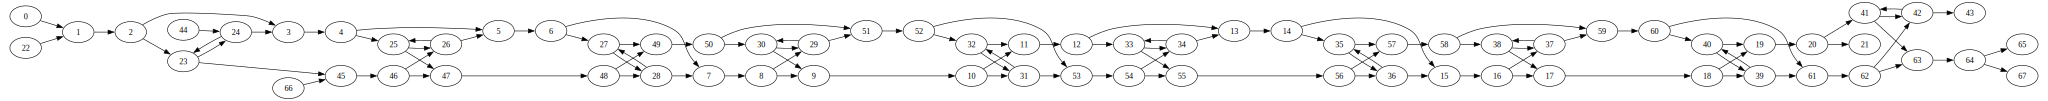

In [8]:
from graphviz import Digraph

# Function to create a DOT representation of linked lists
def visualise(start_ids, partition_dict, dot=None):
    visited = []
    def visualise_recursive(start_ids, partition_dict, dot):
        nonlocal visited
        if dot is None:
            dot = Digraph(comment='Partition Graph')

        for i, sp in enumerate(start_ids):
            current_partition = partition_dict[sp]
            if current_partition.partition_id in visited:
                return dot
            dot.node(f"{current_partition.partition_id}", str(current_partition.partition_id))
            visited.append(current_partition.partition_id)
            children_ids = current_partition.get_children()
            for child_id in children_ids:
                child_partition = partition_dict[child_id]
                dot = visualise_recursive([child_id], partition_dict, dot)
                dot.edge(f"{current_partition.partition_id}", f"{child_partition.partition_id}")
        return dot
    return visualise_recursive(start_ids, partition_dict, dot)

 # Sample linked lists

# Create a DOT representation
dot_representation = visualise(start_partition_ids, partition_dict)
dot_representation.attr(rankdir='LR')  
# Display the DOT representation in a Jupyter Notebook (optional)
dot_representation

In [9]:
components = Partition.tarjan_strongly_connected(partition_dict)
print (components)

[[43], [65], [67], [64], [63], [42, 41], [21], [20], [19], [62], [61], [39, 40], [60], [59], [18], [17], [37, 38], [58], [57], [16], [15], [36, 35], [14], [13], [56], [55], [34, 33], [12], [11], [54], [53], [31, 32], [52], [51], [10], [9], [29, 30], [50], [49], [8], [7], [28, 27], [6], [5], [48], [47], [26, 25], [4], [3], [46], [45], [24, 23], [2], [1], [0], [22], [44], [66]]


In [10]:
merged_partition_dict = Partition.merge_strongly_connected_components(partition_dict, components)
for sid in start_partition_ids:
    if sid not in merged_partition_dict:
        print ("Something is wrong")

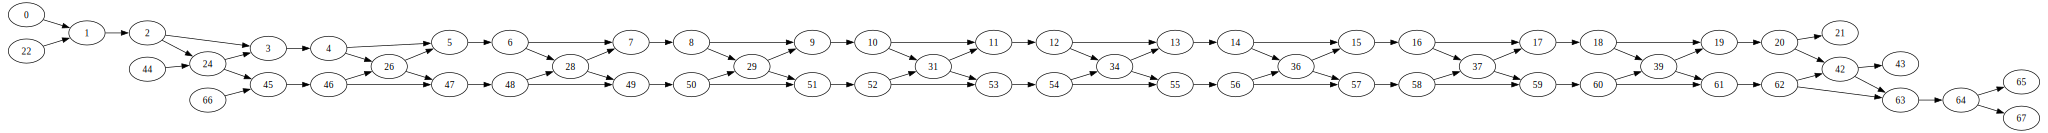

ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'http://127.0.0.1:8888';                       use --allow-websocket-origin=127.0.0.1:8888 or set BOKEH_ALLOW_WS_ORIGIN=127.0.0.1:8888 to permit this; currently we allow origins {'localhost:8888'}


In [11]:
from graphviz import Digraph

 # Sample linked lists
# Create a DOT representation
dot_representation = visualise(start_partition_ids, merged_partition_dict)
dot_representation.attr(rankdir='LR')  
# Display the DOT representation in a Jupyter Notebook (optional)
dot_representation